<font size="+3" color=blue><b> <center><u>Sentiment Analysis For Beginner</u></center></b></font>

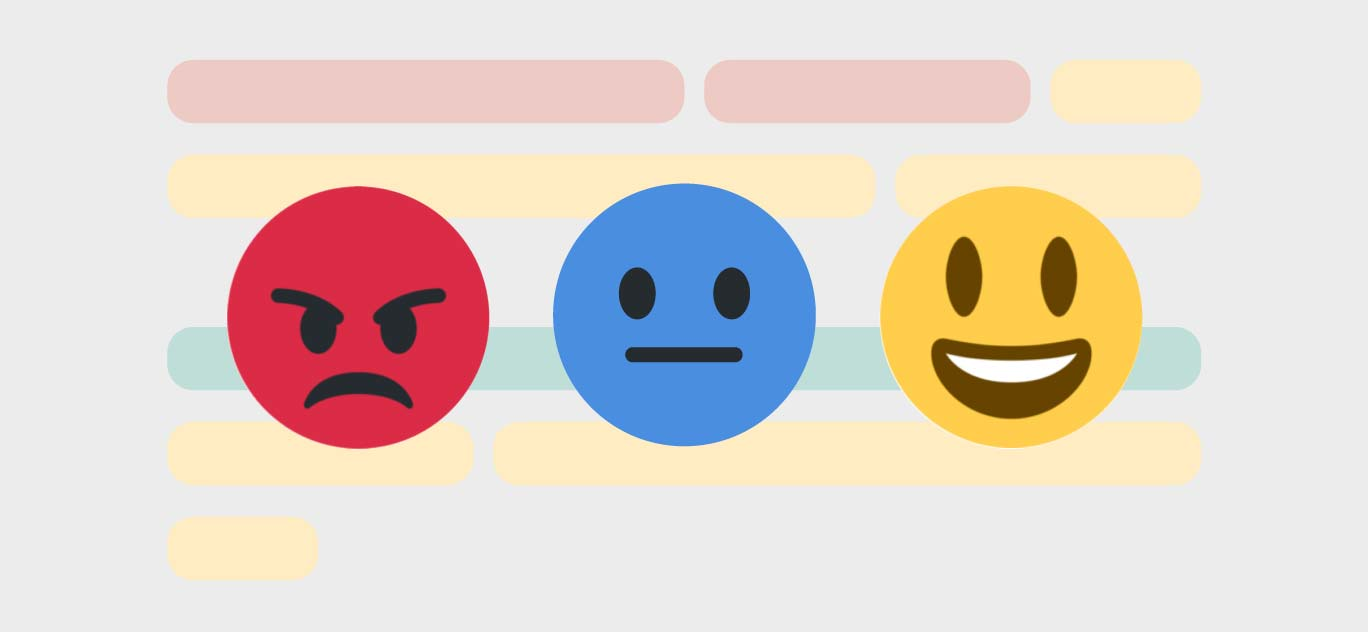

# Objective
Goal of this kernel is following:
- Learn how to train FastAI  ULMFIT on custom text data.
- Learn how to implement language model on custom data.
- Learn how to use Transfer Learning to get better accuracy.
- Provide Perfect Guide for all the tips and trick to implement Text Classification model and get better accuracy as a Beginner.

I have learned them from [FastAI](https://docs.fast.ai/)

<font size="+1" color=red ><b>Please Upvote my kernel and keep it in your favourite section if you think it is helpful.</b></font>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"><center>Table of content</center></h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is Sentiment Analysis ?](#2)
* [2. What is Transfer Learning ?](#3)    

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#4)
* [2. Import Libraries ](#5)   
    
<font color="blue" size=+1><b> Train a text language model </b></font>
* [1. Data Loading ](#6)
* [2. Data Explorations ](#8)
* [3. Model Loading For Language Model training ](#7)
* [4. Training Language Model ](#9)
* [5. Model Summary ](#10)
* [6. Finding LR ](#11)
* [7. Hyper Parameter Tuning ](#12)
* [8. Saving Model ](#13)

<font color="blue" size=+1><b> Building a Text Classifier </b></font>
* [1. Data Loading ](#14)
* [2. Data Explorations ](#15)
* [3. Model Loading ](#16)
* [4. Training Model ](#17)
* [5. Model Summary ](#18)
* [6. Finding LR ](#19)
* [7. Hyper Parameter Tuning ](#20)
* [8. Saving Model ](#21)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#22)
* [2. Prediction Using Trained Model](#23)
* [3. Save and Load Model](#24)
* [4. Sources](#25)

<a id="1"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab"><center><font color="black" size=+2.5><b>Introduction</b></font></center></h3>

<a id="2"></a>
<font color="blue" size=+2.5><b>1.2  What is Sentiment Analysis ?</b></font>
<br/>
<br/>
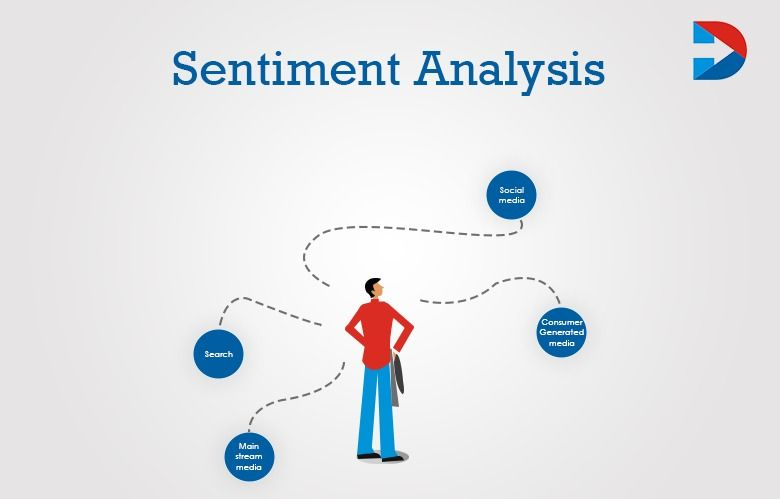

<br/>
**Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.**

<a id="3"></a>
<font color="blue" size=+2.5><b>1.3  What is Language Model ?</b></font>
<br/>
<br/>

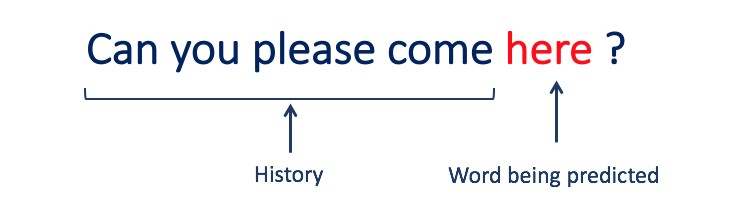
**A language model learns to predict the probability of a sequence of words. But why do we need to learn the probability of words? Let’s understand that with an example.**

I’m sure you have used Google Translate at some point. We all use it to translate one language to another for varying reasons. This is an example of a popular NLP application called Machine Translation.

In Machine Translation, you take in a bunch of words from a language and convert these words into another language. Now, there can be many potential translations that a system might give you and you will want to compute the probability of each of these translations to understand which one is the most accurate.
[Source](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/)

<a id="1.1"></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab"><center><font color="black" size=+2.5><b>About Data</b></font></center></h3><br/>
<br/>
IMDb is the most popular movie website and it combines movie plot description, Metastore ratings, critic and user ratings and reviews, release dates, and many more aspects.

The website is well know for storing almost every movie that has ever been released (the oldest is from 1874 - "Passage de Venus") or just planned to be released (newest movie is from 2027 - "Avatar 5").

IMDb stores information related to more than 6 million titles (of which almost 500,000 are featured films) and it is owned by Amazon since 1998.


## The dataset used contains
IMDB Dataset.csv that has instances (texts from Twitter) 50k rows and atrributes

* Review: the text of the reviews
* Sentiment : this denotes whether a review is about a positive (1) or negative (0)

<a id="5"></a>


<font color="blue" size=+2.5><b>2. Library</b></font>

<a id="4"></a>
<font color="blue" size=+2.5><b>2.1 Installation</b></font>
* Numpy
* Pandas
* Matplotlib
* Fastai

<a id="5"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [ ]:
# !pip install fastai
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import cufflinks as cf 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff
import random


In [ ]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

<a id="6"></a>
<font color="blue" size=+2.5><b> 3.1 Data Loading For training Language Model </b></font>

In [ ]:
df_imdb = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [ ]:
df_imdb.head()

In [ ]:
df_imdb.columns


In [ ]:
df_imdb.shape


In [ ]:
iplot(ff.create_table(df_imdb.dtypes.to_frame().reset_index().round(3)),filename='jupyter-table2')

<a id="3"></a>
<h2 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> <center>  Exploratory Data Analysis </center></h2>

<a id="3.1"></a>
<font color="blue" size=+2.5><b> Missing Value Analysis </b></font>


In [ ]:
df_imdb.isnull().sum()

In [ ]:
msno.bar(df_imdb, color = 'green', figsize = (10,8))

In [ ]:
msno.matrix(df_imdb)

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Target Variable Analysis </b></font>


In [ ]:
species_count = df_imdb['sentiment'].value_counts()
data = [go.Bar(
    x = species_count.index,
    y = species_count.values,
    marker = dict(color = random_colors(3),line=dict(color='#000000', width=2))
)]

layout = go.Layout(
   {
      "title":"Sentimental Reviews",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
trace = go.Pie(labels = list(df_imdb.sentiment.unique()), values = list(df_imdb.sentiment.value_counts()),
                            hole = 0.2,
               marker=dict(colors = random_colors(2), 
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Review Sentiments",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Word Cloud for a Target Variable </b></font>


In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_imdb[(df_imdb['sentiment'] != "positive")]["review"], title="Word Cloud for Negative Reviews")

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_imdb[(df_imdb['sentiment'] != "negative")]["review"], title="Word Cloud for Positive Reviews")

<a id="3.2"></a>
<font color="blue" size=+2.5><b> N-gram Analysis </b></font>


In [ ]:
from collections import defaultdict
train1_df = df_imdb[(df_imdb['sentiment'] != "negative")]
train0_df = df_imdb[(df_imdb['sentiment'] != "positive")]

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ))
    return trace

freq_dict = defaultdict(int)
for sent in train0_df["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), random_colors(50))

freq_dict = defaultdict(int)
for sent in train1_df["review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), random_colors(50))

fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of Positive Reviews", 
                                          "Frequent words of Negative Reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig)


In [ ]:
freq_dict = defaultdict(int)
for sent in train0_df["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), random_colors(50))


freq_dict = defaultdict(int)
for sent in train1_df["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50),random_colors(50))

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of Positive Reviews", 
                                          "Frequent bigrams of Negative Reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig)

In [ ]:
freq_dict = defaultdict(int)
for sent in train0_df["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), random_colors(50))


freq_dict = defaultdict(int)
for sent in train1_df["review"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), random_colors(50))


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of Positive Reviews", 
                                          "Frequent trigrams of Negative Review"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig)

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Feature Engineering </b></font>

* Number of words in the text
* Number of unique words in the text
* Number of characters in the text
* Number of stopwords
* Number of punctuations
* Number of upper case words
* Number of title case words
* Average length of the words

In [ ]:
import string
## Number of words in the text ##
df_imdb["num_words"] = df_imdb["review"].apply(lambda x: len(str(x).split()))
df_imdb["num_words"] = df_imdb["review"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df_imdb["num_unique_words"] = df_imdb["review"].apply(lambda x: len(set(str(x).split())))
df_imdb["num_unique_words"] = df_imdb["review"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df_imdb["num_chars"] = df_imdb["review"].apply(lambda x: len(str(x)))
df_imdb["num_chars"] = df_imdb["review"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df_imdb["num_stopwords"] = df_imdb["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_imdb["num_stopwords"] = df_imdb["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
df_imdb["num_punctuations"] =df_imdb['review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
df_imdb["num_punctuations"] =df_imdb['review'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df_imdb["num_words_upper"] = df_imdb["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_imdb["num_words_upper"] = df_imdb["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df_imdb["num_words_title"] = df_imdb["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_imdb["num_words_title"] = df_imdb["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df_imdb["mean_word_len"] = df_imdb["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_imdb["mean_word_len"] = df_imdb["review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Number of words </b></font>

In [ ]:
cols = "num_words"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Mean words length</b></font>

In [ ]:
cols = "mean_word_len"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Number of in Title </b></font>

In [ ]:
cols = "num_words_title"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Number of words Upper </b></font>

In [ ]:
cols = "num_words_upper"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Number of Punc </b></font>

In [ ]:
cols = "num_punctuations"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Number of Stopwords </b></font>

In [ ]:
cols = "num_stopwords"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Number of Char </b></font>

In [ ]:
cols = "num_chars"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Number of Unique words </b></font>

In [ ]:
cols = "num_unique_words"
trace0 = go.Box(
    name = cols,
    y = df_imdb[cols]
)


data = [trace0]


layout = go.Layout(
   {
      "title":cols,
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [ ]:
Present = df_imdb[(df_imdb['sentiment'] != "negative")]
Not_Present = df_imdb[(df_imdb['sentiment'] != "positive")]

tmp1 = Present[cols]

tmp2 = Not_Present[cols]
hist_data = [tmp1, tmp2]
    
group_labels = ['Positive', 'Negative']
colors = random_colors(2)

fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = 0, curve_type='kde')
    
fig['layout'].update(title = cols)

py.iplot(fig, filename = 'Density plot')

In [ ]:
fig = go.Figure(
    data=[go.Histogram(x=df_imdb[cols])],layout_title_text=cols,layout_title_font =dict(size= 36),layout_title_x=0.5)
fig.show()

In [ ]:
fig = px.violin(df_imdb, y=cols, box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

<a id="3.2"></a>
<font color="blue" size=+2.5><b> Data Preprocessing and Data Cleaning </b></font>


In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
cnt = Counter()
PUNCT_TO_REMOVE = string.punctuation
STOPWORDS = set(stopwords.words('english'))
n_rare_words = 10
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df_imdb["review"] = df_imdb["review"].str.lower()
df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_punctuation(text))
df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_stopwords(text))
df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_emoji(text))
df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_emoticons(text))
df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_urls(text))
df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_html(text))

for text in df_imdb["review"].values:
    for word in text.split():
        cnt[word] += 1
    
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_freqwords(text))

RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
df_imdb["review"] = df_imdb["review"].apply(lambda text: remove_rarewords(text))
df_imdb["review"] = df_imdb["review"].apply(lambda text: stem_words(text))
df_imdb["review"] = df_imdb["review"].apply(lambda text: lemmatize_words(text))

<font color="blue" size=+2.5><b> 3. Train a Text Language Model </b></font>

<a id="8"></a>
<font color="blue" size=+2.5><b> 3.3 Model Loading For Language Model training </b></font>


***Create a databunch for a text language model to get the data ready for training a language model. The text will be processed, tokenized and numericalized by a default processor, if you want to apply a customized tokenizer or vocab, you just need to create them.***

In [ ]:
data_lm = (TextList.from_df(df_imdb)
           #Inputs: all the text files in path
            .split_by_rand_pct(0.20)
           #We randomly split and keep 20% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=128))
data_lm.save('tmp_lm')

In [ ]:
data_lm.show_batch()

Now we can create a language model based on the architecture 
[AWD_LSTM](https://docs.fast.ai/text.models.html#AWD_LSTM)

In [ ]:
# Language model AWD_LSTM
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

<a id="9"></a>
<font color="blue" size=+2.5><b> 3.4 Model Summary </b></font>


In [ ]:
print('Model Summary:')
print(learn.layer_groups)

<a id="10"></a>
<font color="blue" size=+2.5><b> 3.5 Finding LR </b></font>


**Lets train our language model. First, we call lr_find to analyze and find an optimal learning rate for our problem, then we fit or train the model for a few epochs. Finally we unfreeze the model and runs it for a few more epochs. So we have a encoder trained and ready to be used for our classifier and it is recorded on disk.**

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

<a id="11"></a>
<font color="blue" size=+2.5><b> 3.6 HyperParameter Tuning For Model Training </b></font>

In [ ]:
learn.fit_one_cycle(10, 1e-2)
learn.save('lm_hyper')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

<a id="12"></a>
<font color="blue" size=+2.5><b> 3.7 Saving Model After Training </b></font>

In [ ]:
learn.save_encoder('ft_enc')


<a id="13"></a>
<font color="blue" size=+2.5><b> 4. Building and Training a Text Classifier </b></font>

<a id="14"></a>
<font color="blue" size=+2.5><b> 4.1 Loading Data For Text Classification </b></font>


In [ ]:
data_clas = (TextList.from_df(df_imdb, cols=["review"], vocab=data_lm.vocab)
             .split_by_rand_pct(0.20)
             .label_from_df('sentiment')
             .databunch(bs=128))

data_clas.save('tmp_class')


<a id="15"></a>
<font color="blue" size=+2.5><b> 4.2 Loading Text Classification Model </b></font>


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)


**we will have to load the encoder previously trained (the language model).**

In [ ]:
learn.load_encoder('ft_enc')

**Now, the training cycle is repeated: lr_find, freeze except last layer,..., unfreeze the model and saving the final trained model.**

In [ ]:
learn.freeze_to(-1)
learn.summary()

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(10, 1e-3)

In [ ]:
learn.save('stage1')

In [ ]:
learn.load('stage1')
learn.unfreeze()
learn.fit_one_cycle(10, slice(5e-3/2., 5e-3))
learn.save('stage2')

<a id="22"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>
<br/>

In [ ]:
from fastai.vision import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
interp = TextClassificationInterpretation.from_learner(learn)
interp.show_top_losses(10)

<a id="23"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>
<br/>


In [ ]:
learn.export()
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

<a id="24"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
<br/>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a id="18"></a>
<font color="blue" size=+2.5><b>Feedback and Support</b></font>
<br/>
* Your feedback is much appreciated
* Please UPVOTE if you LIKE this notebook
* Comment if you have any doubts or you found any errors in the notebook